In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_recall_fscore_support as prf1_score
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from collections import Counter

import keras
from keras.models import Sequential
from keras.layers import Dense

In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
# from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

In [3]:
import os

In [4]:
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

In [5]:
df = pd.read_csv(r'./covtype.csv')

In [6]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [8]:
unfilter = df.filter(regex='(^Soil|^Wild).+', axis='columns').columns

Numerical variable: Elevation


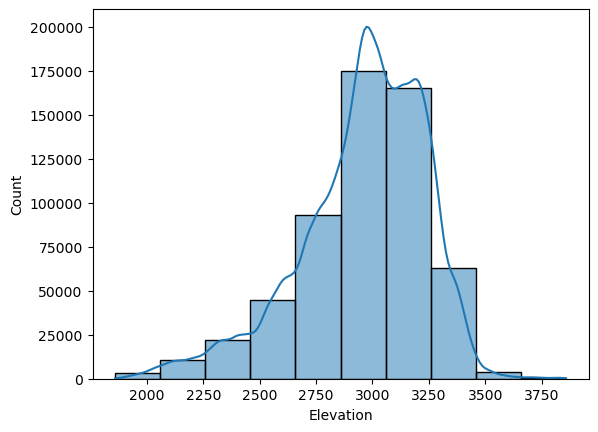

Numerical variable: Aspect


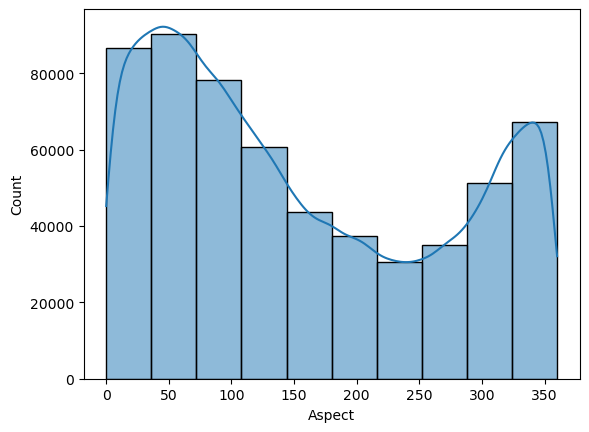

Numerical variable: Slope


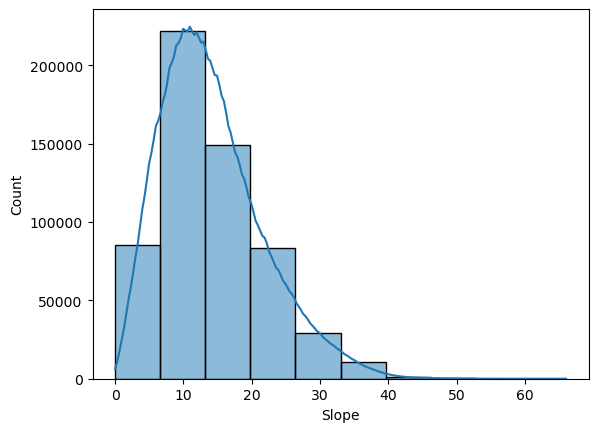

Numerical variable: Horizontal_Distance_To_Hydrology


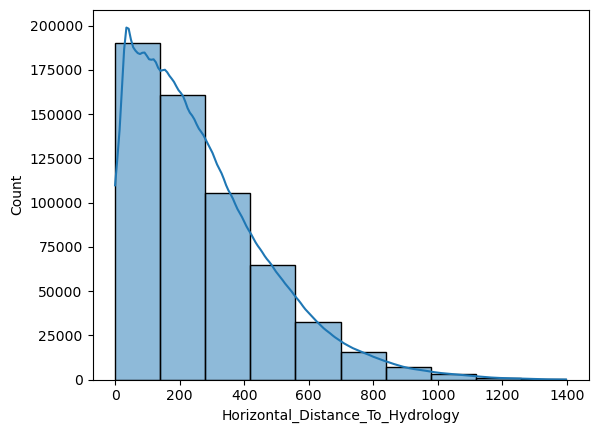

Numerical variable: Vertical_Distance_To_Hydrology


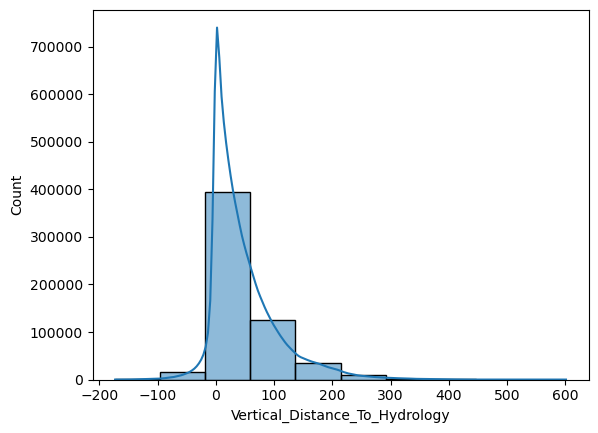

Numerical variable: Horizontal_Distance_To_Roadways


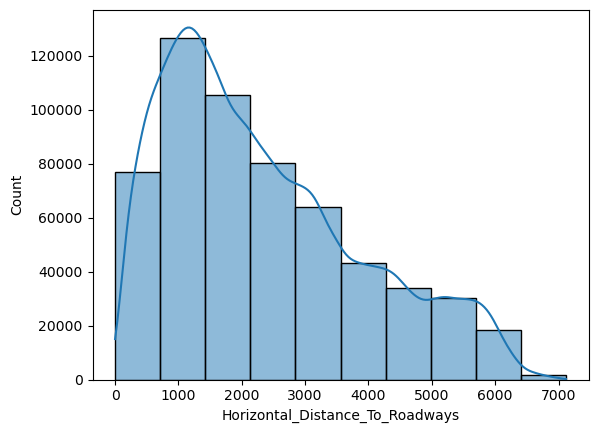

Numerical variable: Hillshade_9am


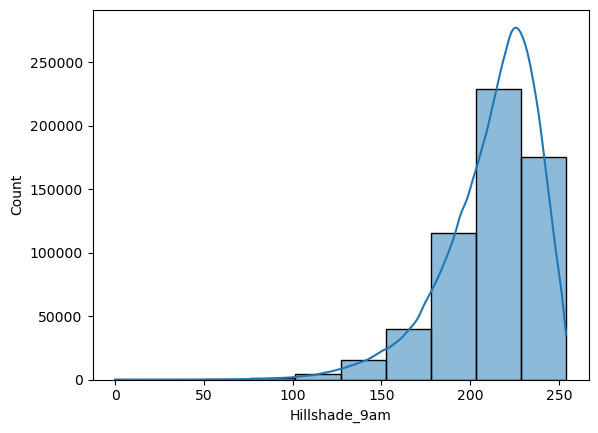

Numerical variable: Hillshade_Noon


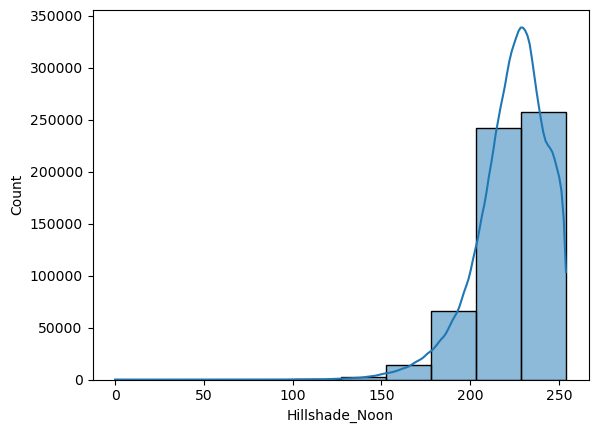

Numerical variable: Hillshade_3pm


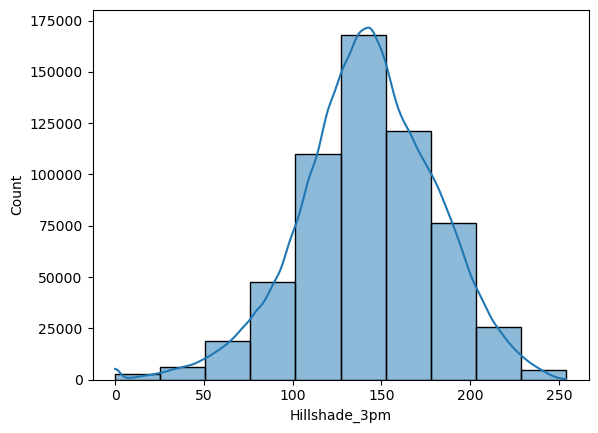

Numerical variable: Horizontal_Distance_To_Fire_Points


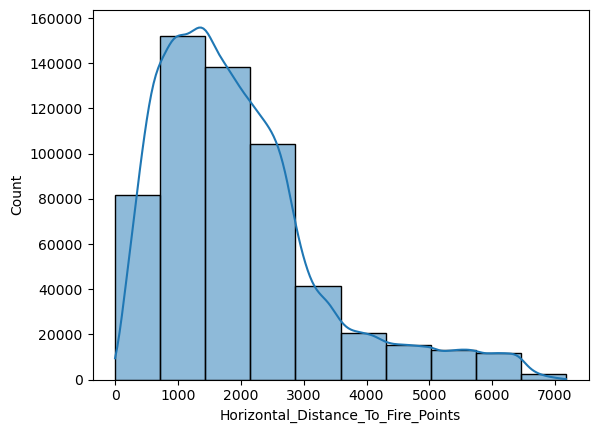

Numerical variable: Cover_Type


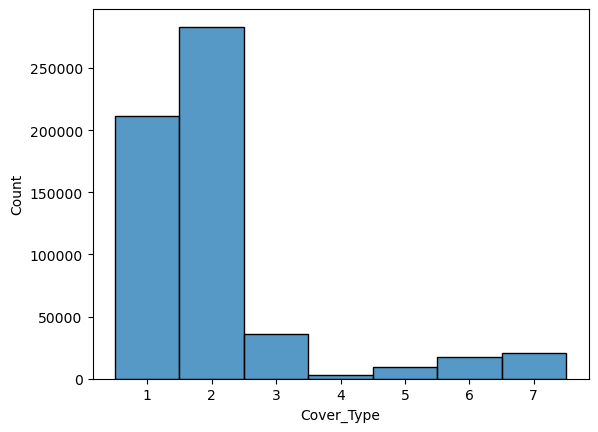

In [9]:
for name in df.drop(columns=unfilter).columns:
    tf_dis = (True if name=='Cover_Type' else False)
    tf_kde = (False if name=='Cover_Type' else True)
    print(f'Numerical variable: {name}')
    sns.histplot(df[name], kde=tf_kde, bins=10, discrete=tf_dis)
    plt.show()

Numerical variable: Elevation


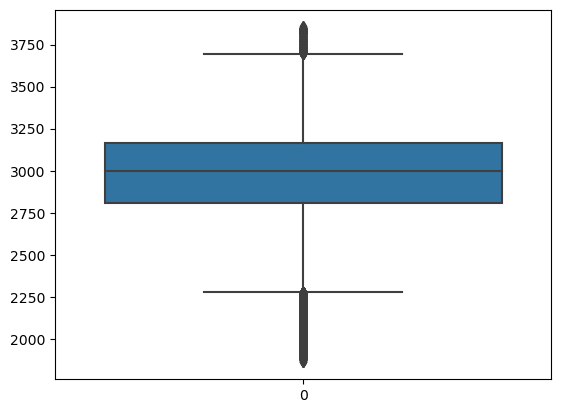

Numerical variable: Aspect


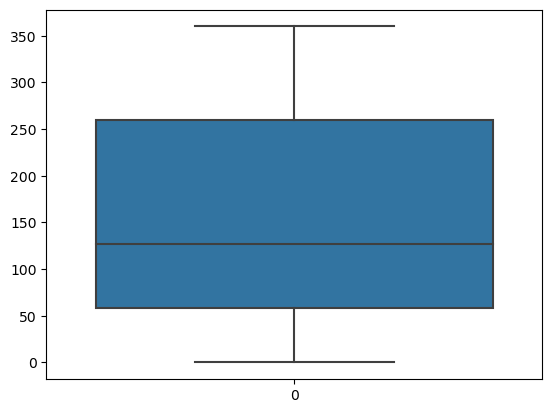

Numerical variable: Slope


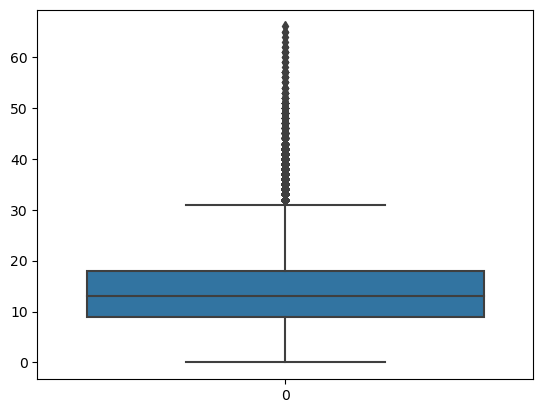

Numerical variable: Horizontal_Distance_To_Hydrology


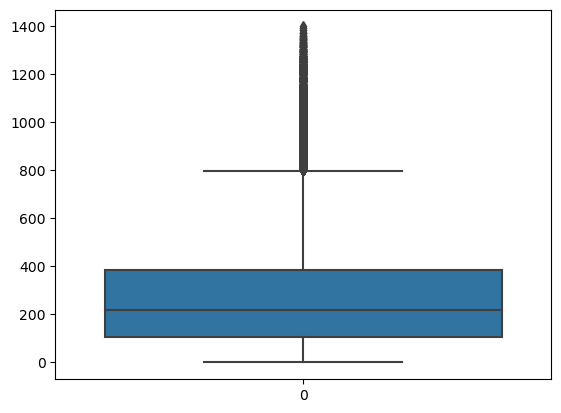

Numerical variable: Vertical_Distance_To_Hydrology


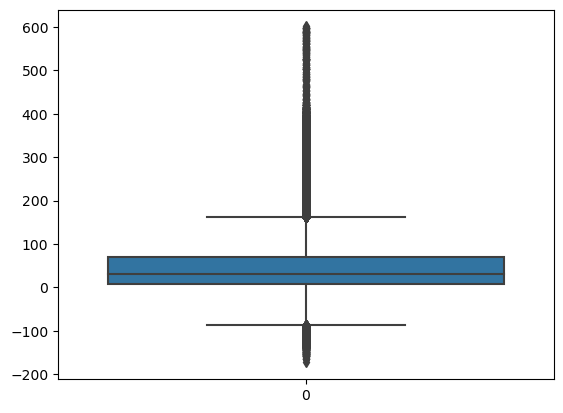

Numerical variable: Horizontal_Distance_To_Roadways


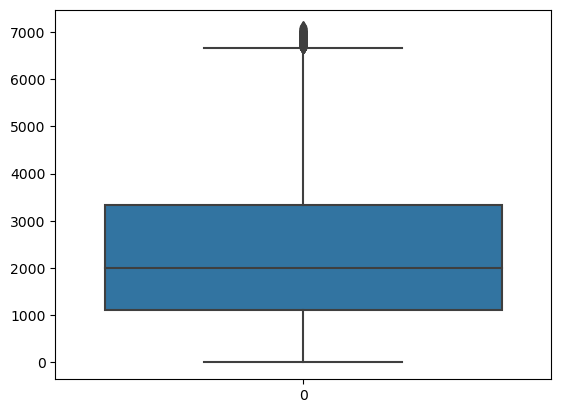

Numerical variable: Hillshade_9am


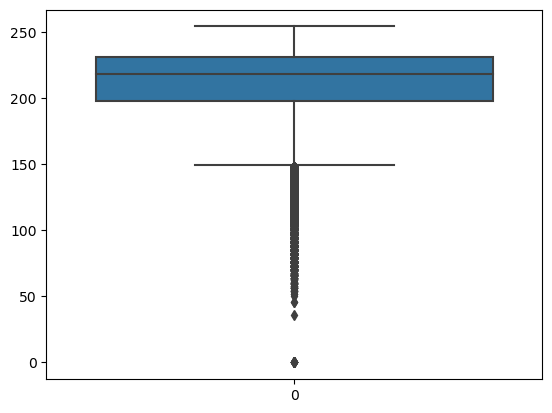

Numerical variable: Hillshade_Noon


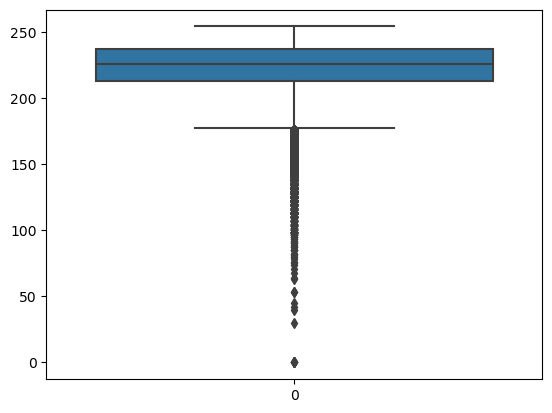

Numerical variable: Hillshade_3pm


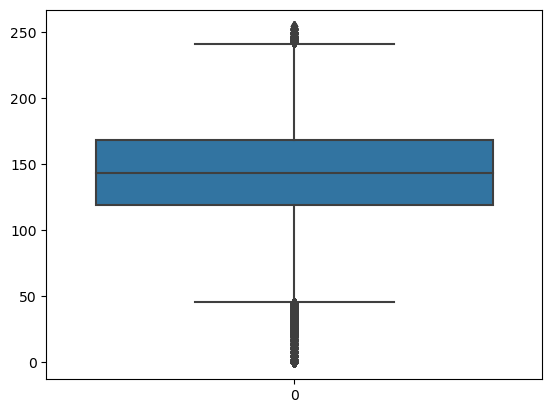

Numerical variable: Horizontal_Distance_To_Fire_Points


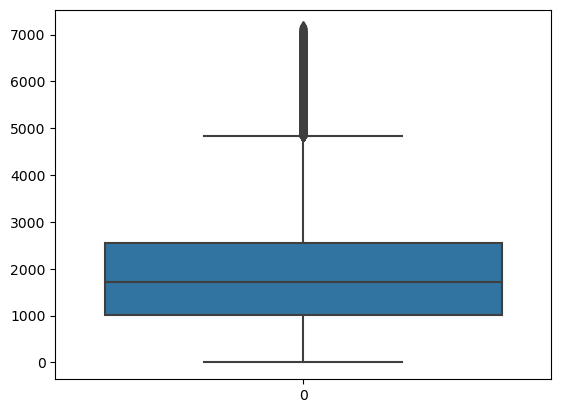

In [10]:
for name in df.drop(columns=list(unfilter)+['Cover_Type']).columns:
    print(f'Numerical variable: {name}')
    sns.boxplot(data=df[name])
    plt.show()

In [11]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [12]:
df[df['Vertical_Distance_To_Hydrology']<0]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
16,2610,259,1,120,-1,607,216,239,161,6096,...,0,0,0,0,0,0,0,0,0,5
26,2489,163,10,30,-4,849,230,243,145,5486,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580705,2707,95,8,595,-11,579,234,228,126,1500,...,0,0,0,0,0,0,0,0,0,3
580728,2505,239,27,480,-94,421,160,250,218,1087,...,0,0,0,0,0,0,0,0,0,3
580729,2518,243,31,474,-81,420,145,246,227,1075,...,0,0,0,0,0,0,0,0,0,3
580730,2538,250,40,458,-61,420,106,232,242,1064,...,0,0,0,0,0,0,0,0,0,3


In [13]:
df.duplicated().any()

False

In [14]:
any(df.isna().any())

False

In [15]:
corr_matrix = df.drop(columns=list(unfilter)+['Cover_Type']).corr()

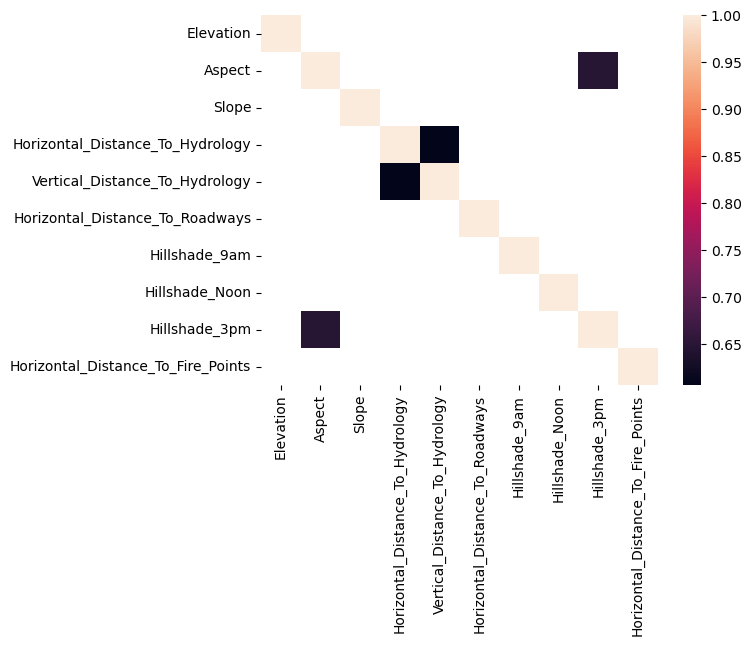

In [16]:
sns.heatmap(corr_matrix, mask=(corr_matrix<0.6))
plt.show()

In [17]:
X = df.iloc[:, :-1]        # Independent variables
y = df.iloc[:, -1]         # Dependent variable

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [19]:
y_train.value_counts()

2    226640
1    169472
3     28603
7     16408
6     13894
5      7594
4      2198
Name: Cover_Type, dtype: int64

In [20]:
cols_preproc = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

In [21]:
X_train_prep=X_train.copy()
X_test_prep=X_test.copy()

In [22]:
# scaler = StandardScaler()
# X_train_scaled[cols] = scaler.fit_transform(X_train[cols])
# X_test_scaled[cols] = scaler.transform(X_test[cols])

In [23]:
scaler_transf = ColumnTransformer(
    [
        ("scaler", StandardScaler(), cols_preproc)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False,
).set_output(transform="pandas")

# X_trained_prep = preprocessor.fit_transform(X_train)
# X_test_prep = preprocessor.transform(X_test)

In [24]:
cols_outl = ['Hillshade_9am', 'Hillshade_Noon']

In [25]:
def outlier_removal(X, factor, cols):
    X = pd.DataFrame(X).copy()
    out_indexes = []
    indexes = X.index.tolist()
    for col in X[cols].columns:
        x = pd.Series(X.loc[:,col]).copy()
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (factor * iqr)
        upper_bound = q3 + (factor * iqr)
        out_index = X.loc[((X.loc[:,col] < lower_bound) | (X.loc[:,col] > upper_bound)),col].index.tolist()
        out_indexes.extend(out_index)
    to_keep_indexes = np.setdiff1d(indexes, out_indexes)
    return X.loc[to_keep_indexes]

def outlier_nan(X, factor, cols):
    X = pd.DataFrame(X).copy()
    for col in X[cols].columns:
        x = pd.Series(X.loc[:,col]).copy()
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (factor * iqr)
        upper_bound = q3 + (factor * iqr)
        X.loc[((X.loc[:,col] < lower_bound) | (X.loc[:,col] > upper_bound)),col] = np.nan
    return X


#creating outlier_remover object using FunctionTransformer with factor=2.0
outlier_remover_transf = FunctionTransformer(outlier_removal,kw_args={'factor':4, 'cols':cols_outl})
outlier_nan_transf = FunctionTransformer(outlier_nan,kw_args={'factor':4, 'cols':cols_outl})

In [26]:
# X_trained_rem_outl = outlier_remover_transf.fit_transform(X_train)

In [27]:
# X_train.shape[0] - X_trained_rem_outl.shape[0]

In [28]:
# X_trained_na = outlier_nan_transf.fit_transform(X_train)

In [29]:
# X_trained_na[cols_outl].isnull().sum()

In [30]:
# data preprocessing
pipeline = Pipeline([('outlier_as_nan', outlier_nan_transf), 
                     ('fill_na', SimpleImputer(strategy='median')), 
                     ('scaler', scaler_transf), 
                     ]).set_output(transform="pandas")

C:\Users\pawel\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [31]:
X_train_prep = pipeline.fit_transform(X_train)

In [32]:
X_train_prep.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
107152,-1.172042,-0.461871,-1.348570,-1.267567,-0.795940,-0.989506,0.518775,0.541616,0.011890,-0.164574,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486925,1.170182,-0.435074,1.454901,0.890732,1.434043,-0.772757,1.530264,-1.138849,-2.130375,-0.664261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12620,-2.960844,-0.104576,-0.280581,-1.126502,-0.761633,-0.758008,0.930863,0.745308,-0.353862,-0.419701,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149576,0.224009,-0.774503,-0.280581,0.622708,0.524896,1.215818,0.743550,-0.324078,-0.719615,-0.148723,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
512054,0.823847,-0.854895,-0.013584,-0.844371,-0.298483,-0.458535,0.668625,-0.731463,-0.902491,0.243026,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
X_test_prep = pipeline.transform(X_test)
X_test_prep.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
41804,0.113325,-0.631586,-0.681077,1.097627,0.439127,1.779494,0.781013,0.083307,-0.484488,2.658432,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14445,1.430826,0.261651,-0.147082,1.393864,0.953739,1.358821,0.368925,1.305463,0.403768,0.439277,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194721,1.166611,1.753355,-0.814575,-0.844371,-0.693018,1.120911,-0.230477,0.134230,0.403768,-0.259681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317944,-0.350835,-0.470803,-0.147082,1.586654,-0.298483,-1.217798,1.118176,-0.069462,-0.902491,-0.610669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166561,-0.447238,-0.524397,-0.681077,-0.759732,-0.572942,-0.747107,0.893401,0.185154,-0.536738,-0.110982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
# building base model
classifier = Sequential()
classifier.add(Dense(units=54, kernel_initializer='he_uniform', activation='relu', input_dim = 54))
classifier.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=35, kernel_initializer='he_uniform', activation='relu'))
classifier.add(Dense(units=8, activation='softmax'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 54)                2970      
                                                                 
 dense_1 (Dense)             (None, 50)                2750      
                                                                 
 dense_2 (Dense)             (None, 35)                1785      
                                                                 
 dense_3 (Dense)             (None, 8)                 288       
                                                                 
Total params: 7,793
Trainable params: 7,793
Non-trainable params: 0
_________________________________________________________________


In [36]:
model_history = classifier.fit(X_train_prep, y_train, validation_split=0.33, batch_size=1000, epochs=100)

Epoch 1/100
312/312 [==============================] - 4s 8ms/step - loss: 0.8565 - accuracy: 0.6545 - val_loss: 0.6125 - val_accuracy: 0.7392
Epoch 2/100
312/312 [==============================] - 2s 6ms/step - loss: 0.5768 - accuracy: 0.7554 - val_loss: 0.5526 - val_accuracy: 0.7637
Epoch 3/100
312/312 [==============================] - 2s 6ms/step - loss: 0.5303 - accuracy: 0.7750 - val_loss: 0.5159 - val_accuracy: 0.7801
Epoch 4/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4984 - accuracy: 0.7887 - val_loss: 0.4886 - val_accuracy: 0.7930
Epoch 5/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4763 - accuracy: 0.7986 - val_loss: 0.4793 - val_accuracy: 0.7935
Epoch 6/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4585 - accuracy: 0.8066 - val_loss: 0.4588 - val_accuracy: 0.8053
Epoch 7/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4454 - accuracy: 0.8136 - val_loss: 0.4521 - val_accuracy: 0.8059

Epoch 58/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2907 - accuracy: 0.8823 - val_loss: 0.3090 - val_accuracy: 0.8763
Epoch 59/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2899 - accuracy: 0.8825 - val_loss: 0.3098 - val_accuracy: 0.8768
Epoch 60/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2891 - accuracy: 0.8832 - val_loss: 0.3041 - val_accuracy: 0.8780
Epoch 61/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2879 - accuracy: 0.8840 - val_loss: 0.3007 - val_accuracy: 0.8808
Epoch 62/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2861 - accuracy: 0.8844 - val_loss: 0.3080 - val_accuracy: 0.8777
Epoch 63/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2860 - accuracy: 0.8842 - val_loss: 0.3022 - val_accuracy: 0.8803
Epoch 64/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2845 - accuracy: 0.8849 - val_loss: 0.3049 - val_accuracy:

In [37]:
score = classifier.evaluate(X_test_prep, y_test)
score

3632/3632 [==============================] - 8s 2ms/step - loss: 0.3098 - accuracy: 0.8721


[0.3098115921020508, 0.8721375465393066]

In [38]:
y_pred = classifier.predict(X_test_prep)
y_pred = np.argmax(y_pred, axis=1)
y_pred

3632/3632 [==============================] - 6s 2ms/step


array([2, 7, 1, ..., 1, 2, 2], dtype=int64)

In [39]:
accuracy_score(y_test, y_pred)

0.8721375523867714

In [40]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.83      0.93      0.88     42368
           2       0.94      0.84      0.88     56661
           3       0.85      0.88      0.87      7151
           4       0.78      0.78      0.78       549
           5       0.75      0.62      0.68      1899
           6       0.69      0.78      0.73      3473
           7       0.88      0.91      0.89      4102

    accuracy                           0.87    116203
   macro avg       0.82      0.82      0.82    116203
weighted avg       0.88      0.87      0.87    116203



In [41]:
# data preprocessing - only standard scaler
pipeline2 = Pipeline([('preprocessor', scaler_transf)]).set_output(transform="pandas")

In [42]:
X_train_prep2 = pipeline2.fit_transform(X_train)

In [43]:
X_train_prep2.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
107152,-1.172042,-0.461871,-1.348570,-1.267567,-0.795940,-0.989506,0.518351,0.539973,0.011890,-0.164574,...,0,0,0,0,0,0,0,0,0,0
486925,1.170182,-0.435074,1.454901,0.890732,1.434043,-0.772757,1.527549,-1.128081,-2.130375,-0.664261,...,0,0,0,0,0,0,0,0,0,1
12620,-2.960844,-0.104576,-0.280581,-1.126502,-0.761633,-0.758008,0.929506,0.742162,-0.353862,-0.419701,...,0,0,0,0,0,0,0,0,0,0
149576,0.224009,-0.774503,-0.280581,0.622708,0.524896,1.215818,0.742617,-0.319327,-0.719615,-0.148723,...,0,0,0,0,0,0,0,0,0,0
512054,0.823847,-0.854895,-0.013584,-0.844371,-0.298483,-0.458535,0.667862,-0.723704,-0.902491,0.243026,...,0,0,1,0,0,0,0,0,0,0


In [44]:
X_test_prep2 = pipeline2.transform(X_test)
X_test_prep2.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
41804,0.113325,-0.631586,-0.681077,1.097627,0.439127,1.779494,0.779995,0.085050,-0.484488,2.658432,...,0,0,0,0,0,0,0,0,0,0
14445,1.430826,0.261651,-0.147082,1.393864,0.953739,1.358821,0.368840,1.298180,0.403768,0.439277,...,0,0,1,0,0,0,0,0,0,0
194721,1.166611,1.753355,-0.814575,-0.844371,-0.693018,1.120911,-0.229204,0.135597,0.403768,-0.259681,...,0,0,0,0,0,0,0,0,0,0
317944,-0.350835,-0.470803,-0.147082,1.586654,-0.298483,-1.217798,1.116394,-0.066592,-0.902491,-0.610669,...,0,0,0,0,0,0,0,0,0,0
166561,-0.447238,-0.524397,-0.681077,-0.759732,-0.572942,-0.747107,0.892128,0.186144,-0.536738,-0.110982,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# building base model
classifier2 = Sequential()
classifier2.add(Dense(units=54, kernel_initializer='he_uniform', activation='relu', input_dim = 54))
classifier2.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu'))
classifier2.add(Dense(units=35, kernel_initializer='he_uniform', activation='relu'))
classifier2.add(Dense(units=8, activation='softmax'))

# Compiling the ANN
classifier2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [46]:
model_history2 = classifier2.fit(X_train_prep2, y_train, validation_split=0.33, batch_size=1000, epochs=100)

Epoch 1/100
312/312 [==============================] - 3s 8ms/step - loss: 0.8002 - accuracy: 0.6835 - val_loss: 0.6093 - val_accuracy: 0.7418
Epoch 2/100
312/312 [==============================] - 2s 6ms/step - loss: 0.5706 - accuracy: 0.7586 - val_loss: 0.5463 - val_accuracy: 0.7674
Epoch 3/100
312/312 [==============================] - 2s 7ms/step - loss: 0.5228 - accuracy: 0.7778 - val_loss: 0.5097 - val_accuracy: 0.7821
Epoch 4/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4904 - accuracy: 0.7905 - val_loss: 0.4796 - val_accuracy: 0.7958
Epoch 5/100
312/312 [==============================] - 2s 7ms/step - loss: 0.4665 - accuracy: 0.8026 - val_loss: 0.4751 - val_accuracy: 0.7937
Epoch 6/100
312/312 [==============================] - 2s 7ms/step - loss: 0.4480 - accuracy: 0.8111 - val_loss: 0.4494 - val_accuracy: 0.8096
Epoch 7/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4345 - accuracy: 0.8177 - val_loss: 0.4342 - val_accuracy: 0.8175

Epoch 58/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2910 - accuracy: 0.8822 - val_loss: 0.3062 - val_accuracy: 0.8788
Epoch 59/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2906 - accuracy: 0.8825 - val_loss: 0.3038 - val_accuracy: 0.8785
Epoch 60/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2910 - accuracy: 0.8824 - val_loss: 0.3037 - val_accuracy: 0.8803
Epoch 61/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2892 - accuracy: 0.8835 - val_loss: 0.3001 - val_accuracy: 0.8806
Epoch 62/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2877 - accuracy: 0.8837 - val_loss: 0.2990 - val_accuracy: 0.8818
Epoch 63/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2869 - accuracy: 0.8845 - val_loss: 0.2998 - val_accuracy: 0.8813
Epoch 64/100
312/312 [==============================] - 2s 7ms/step - loss: 0.2851 - accuracy: 0.8856 - val_loss: 0.2980 - val_accuracy:

In [47]:
score2 = classifier.evaluate(X_test_prep2, y_test)
score2

3632/3632 [==============================] - 6s 2ms/step - loss: 0.3100 - accuracy: 0.8722


[0.3100223243236542, 0.8721891641616821]

In [48]:
y_pred2 = classifier.predict(X_test_prep2)
y_pred2 = np.argmax(y_pred2, axis=1)
y_pred2

3632/3632 [==============================] - 6s 2ms/step


array([2, 7, 1, ..., 1, 2, 2], dtype=int64)

In [49]:
accuracy_score(y_test, y_pred2)

0.8721891861655895

In [50]:
# Classification Report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.83      0.93      0.88     42368
           2       0.94      0.84      0.89     56661
           3       0.85      0.88      0.87      7151
           4       0.78      0.78      0.78       549
           5       0.75      0.62      0.68      1899
           6       0.69      0.78      0.73      3473
           7       0.88      0.91      0.89      4102

    accuracy                           0.87    116203
   macro avg       0.82      0.82      0.82    116203
weighted avg       0.88      0.87      0.87    116203



In [51]:
cr1 = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T
cr2 = pd.DataFrame(classification_report(y_test, y_pred2, output_dict=True)).T

In [52]:
# scaling only gave same results
cr2 - cr1

,precision,recall,f1-score,support
1,0.000125,-0.000307,-0.000065,0.000000
2,0.000020,0.000282,0.000166,0.000000
3,-0.000425,0.000280,-0.000082,0.000000
4,-0.000641,0.003643,0.001507,0.000000
5,0.000478,0.000000,0.000197,0.000000
6,0.001514,-0.000288,0.000723,0.000000
7,-0.001850,0.000000,-0.000962,0.000000
accuracy,0.000052,0.000052,0.000052,0.000052
macro avg,-0.000111,0.000516,0.000212,0.000000
weighted avg,0.000014,0.000052,0.000050,0.000000


In [53]:
precision, recall, fscore, support = prf1_score(y_test, y_pred2)

scores_df = pd.DataFrame({'precision': precision, 'recall': recall, 'f1score':fscore}, 
                         index=sorted(list(y_test.unique())))

In [54]:
scores_df.style.format("{:.2%}")

,precision,recall,f1score
1,82.52%,93.23%,87.55%
2,93.74%,83.85%,88.52%
3,85.37%,87.72%,86.53%
4,78.32%,78.32%,78.32%
5,75.35%,62.45%,68.30%
6,69.35%,78.06%,73.45%
7,87.59%,91.20%,89.36%


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


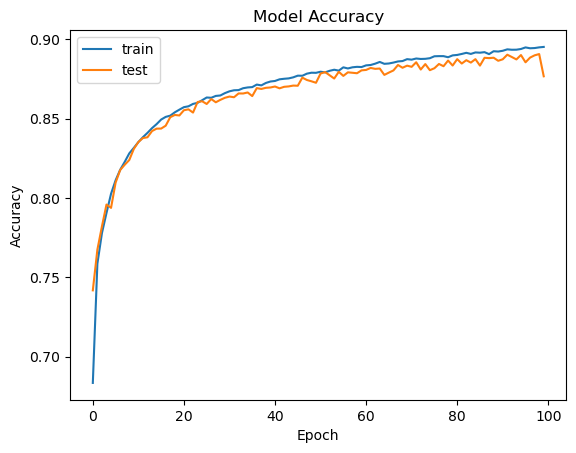

In [55]:
# List all data in history
print(model_history2.history.keys())

# Summarize history for accuracy
plt.plot(model_history2.history['accuracy'])
plt.plot(model_history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

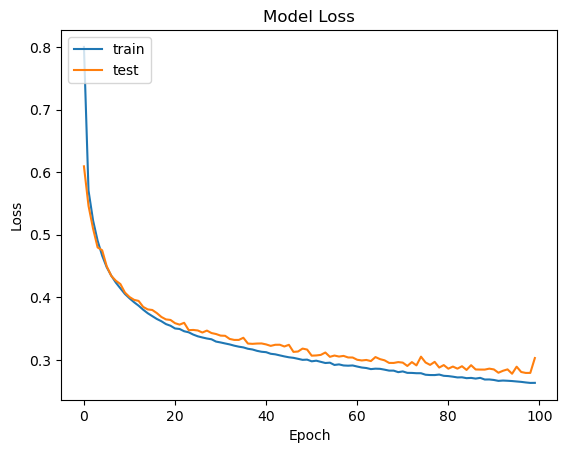

In [56]:
# Summarize history for loss

plt.plot(model_history2.history['loss'])
plt.plot(model_history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
cm = confusion_matrix(y_pred, y_test)
cm_norm = confusion_matrix(y_pred, y_test, normalize='true')

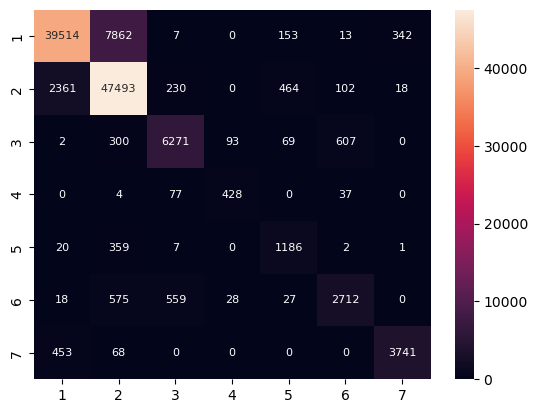

In [58]:
ax = plt.subplot()
cm_heatmap = sns.heatmap(cm, annot=True, fmt='.0f', annot_kws={"size":8}, ax=ax)
cm_heatmap.set_xticklabels(range(1,8))
cm_heatmap.set_yticklabels(range(1,8))
plt.show()

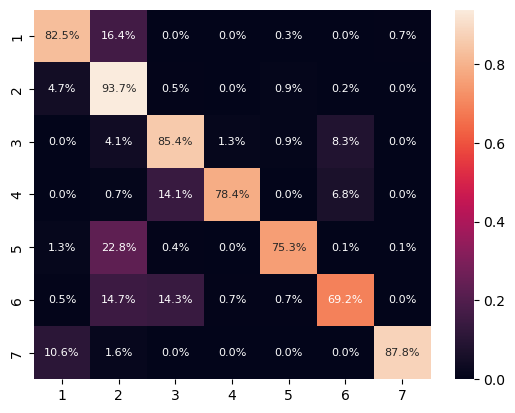

In [59]:
ax = plt.subplot()
cm_heatmap = sns.heatmap(cm_norm, annot=True, fmt='.1%', annot_kws={"size":8}, ax=ax)
cm_heatmap.set_xticklabels(range(1,8))
cm_heatmap.set_yticklabels(range(1,8))
plt.show()

In [69]:
# check with class weights

In [70]:
from sklearn.utils import class_weight

In [71]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

In [72]:
class_weights_dict = dict(enumerate(class_weights))

In [73]:
class_weights_dict

{0: 0.39181272253992233,
 1: 0.29298131712974634,
 2: 2.3214797648598298,
 3: 30.209866112049916,
 4: 8.743914368486399,
 5: 4.779133850171708,
 6: 4.046884794873581}

In [74]:
# building base model
classifier3 = Sequential()
classifier3.add(Dense(units=54, kernel_initializer='he_uniform', activation='relu', input_dim = 54))
classifier3.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu'))
classifier3.add(Dense(units=35, kernel_initializer='he_uniform', activation='relu'))
classifier3.add(Dense(units=8, activation='softmax'))

# Compiling the ANN
classifier3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [75]:
# y values need to start from 0
model_history3 = classifier3.fit(X_train_prep2, y_train-1, validation_split=0.33, 
                                 batch_size=1000, epochs=100, class_weight=class_weights_dict)

Epoch 1/100
312/312 [==============================] - 3s 8ms/step - loss: 0.8966 - accuracy: 0.5526 - val_loss: 0.9339 - val_accuracy: 0.5868
Epoch 2/100
312/312 [==============================] - 2s 8ms/step - loss: 0.6037 - accuracy: 0.6329 - val_loss: 0.8727 - val_accuracy: 0.6113
Epoch 3/100
312/312 [==============================] - 2s 7ms/step - loss: 0.5543 - accuracy: 0.6540 - val_loss: 0.7471 - val_accuracy: 0.6670
Epoch 4/100
312/312 [==============================] - 2s 6ms/step - loss: 0.5243 - accuracy: 0.6685 - val_loss: 0.7218 - val_accuracy: 0.6773
Epoch 5/100
312/312 [==============================] - 2s 6ms/step - loss: 0.5026 - accuracy: 0.6801 - val_loss: 0.6930 - val_accuracy: 0.6899
Epoch 6/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4847 - accuracy: 0.6900 - val_loss: 0.7041 - val_accuracy: 0.6916
Epoch 7/100
312/312 [==============================] - 2s 6ms/step - loss: 0.4687 - accuracy: 0.6972 - val_loss: 0.6913 - val_accuracy: 0.6941

Epoch 58/100
312/312 [==============================] - 2s 7ms/step - loss: 0.2712 - accuracy: 0.8115 - val_loss: 0.4718 - val_accuracy: 0.8081
Epoch 59/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2687 - accuracy: 0.8123 - val_loss: 0.4523 - val_accuracy: 0.8139
Epoch 60/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2672 - accuracy: 0.8137 - val_loss: 0.4525 - val_accuracy: 0.8140
Epoch 61/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2660 - accuracy: 0.8141 - val_loss: 0.4682 - val_accuracy: 0.8089
Epoch 62/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2638 - accuracy: 0.8155 - val_loss: 0.4827 - val_accuracy: 0.8040
Epoch 63/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2653 - accuracy: 0.8159 - val_loss: 0.4564 - val_accuracy: 0.8148
Epoch 64/100
312/312 [==============================] - 2s 6ms/step - loss: 0.2620 - accuracy: 0.8165 - val_loss: 0.4449 - val_accuracy:

In [76]:
score3 = classifier3.evaluate(X_test_prep2, y_test-1)
score3

3632/3632 [==============================] - 7s 2ms/step - loss: 0.4392 - accuracy: 0.8207


[0.43917644023895264, 0.8207189440727234]

In [77]:
y_pred3 = classifier3.predict(X_test_prep2)
y_pred3 = np.argmax(y_pred3, axis=1)+1
y_pred3

3632/3632 [==============================] - 7s 2ms/step


array([2, 7, 7, ..., 1, 2, 2], dtype=int64)

In [78]:
# worse result
accuracy_score(y_test, y_pred3)

0.820718914313744

In [79]:
# Classification Report

print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           1       0.81      0.84      0.82     42368
           2       0.90      0.78      0.83     56661
           3       0.85      0.85      0.85      7151
           4       0.71      0.93      0.80       549
           5       0.44      0.95      0.60      1899
           6       0.64      0.92      0.75      3473
           7       0.70      0.98      0.81      4102

    accuracy                           0.82    116203
   macro avg       0.72      0.89      0.78    116203
weighted avg       0.84      0.82      0.82    116203



In [80]:
# check with under sampling

In [81]:
# under = RandomUnderSampler(sampling_strategy={1:20000, 2:25000, 3:7000, 7:4000, 6:3502, 5:1886, 4:569})
# over = SMOTE(k_neighbors=3, sampling_strategy={1:25000, 2:25000, 3:15000, 7:10000, 6:10000, 5:5000, 4:5000})
# steps = [('under', under), ('over', over), ('model', classifier)]
# pipeline = Pipeline(steps=steps)

In [82]:
# model_history2 = pipeline.fit(X_train_prep, y_train, model__validation_split=0.33, 
#                               model__batch_size=1000, model__epochs=100)

In [83]:
over_transf = SMOTE(k_neighbors=3)
# X_train_os, y_train_os = over.fit_resample(X_train_prep2, y_train)

In [84]:
# building base model
classifier4 = Sequential()
classifier4.add(Dense(units=54, kernel_initializer='he_uniform', activation='relu', input_dim = 54))
classifier4.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu'))
classifier4.add(Dense(units=35, kernel_initializer='he_uniform', activation='relu'))
classifier4.add(Dense(units=8, activation='softmax'))

# Compiling the ANN
classifier4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [85]:
# data preprocessing + model
full_pipeline = Pipeline([('outlier_as_nan', outlier_nan_transf), 
                          ('fill_na', SimpleImputer(strategy='median')), 
                          ('scaler', scaler_transf), 
                          ('over_sampler', over_transf),
                          ('model', classifier4)
                         ]).set_output(transform="pandas")

C:\Users\pawel\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [86]:
model_history4 = full_pipeline.fit(X_train, y_train, model__validation_split=0.33,
                                   model__batch_size=1000, model__epochs=100)

Epoch 1/100
1063/1063 [==============================] - 8s 7ms/step - loss: 0.5513 - accuracy: 0.7838 - val_loss: 1.4507 - val_accuracy: 0.4495
Epoch 2/100
1063/1063 [==============================] - 6s 6ms/step - loss: 0.3783 - accuracy: 0.8506 - val_loss: 1.3004 - val_accuracy: 0.5031
Epoch 3/100
1063/1063 [==============================] - 6s 6ms/step - loss: 0.3360 - accuracy: 0.8680 - val_loss: 1.2943 - val_accuracy: 0.5183
Epoch 4/100
1063/1063 [==============================] - 7s 6ms/step - loss: 0.3119 - accuracy: 0.8776 - val_loss: 1.2122 - val_accuracy: 0.5266
Epoch 5/100
1063/1063 [==============================] - 6s 6ms/step - loss: 0.2949 - accuracy: 0.8850 - val_loss: 1.2169 - val_accuracy: 0.5471
Epoch 6/100
1063/1063 [==============================] - 6s 6ms/step - loss: 0.2826 - accuracy: 0.8905 - val_loss: 1.1739 - val_accuracy: 0.5651
Epoch 7/100
1063/1063 [==============================] - 7s 6ms/step - loss: 0.2726 - accuracy: 0.8944 - val_loss: 1.1868 - val_ac

In [88]:
# X_test_prep has the same preprocessing steps as steps in full_pipeline
score4 = classifier4.evaluate(X_test_prep, y_test)
score4

3632/3632 [==============================] - 8s 2ms/step - loss: 0.3118 - accuracy: 0.8776


[0.31182825565338135, 0.877567708492279]

In [89]:
y_pred4 = classifier4.predict(X_test_prep)
y_pred4 = np.argmax(y_pred4, axis=1)
y_pred4

3632/3632 [==============================] - 7s 2ms/step


array([2, 1, 1, ..., 1, 2, 1], dtype=int64)

In [90]:
accuracy_score(y_test, y_pred4)

0.8775677047924753

In [91]:
# Classification Report

print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           1       0.86      0.90      0.88     42368
           2       0.92      0.87      0.89     56661
           3       0.79      0.96      0.87      7151
           4       0.76      0.91      0.83       549
           5       0.61      0.95      0.74      1899
           6       0.87      0.52      0.66      3473
           7       0.94      0.86      0.90      4102

    accuracy                           0.88    116203
   macro avg       0.82      0.85      0.82    116203
weighted avg       0.88      0.88      0.88    116203



In [92]:
precision, recall, fscore, support = prf1_score(y_test, y_pred4)

scores_df2 = pd.DataFrame({'precision': precision, 'recall': recall, 'f1score':fscore}, 
                         index=sorted(list(y_test.unique())))

In [93]:
cm2 = confusion_matrix(y_test, y_pred4)
cm2_norm = confusion_matrix(y_test, y_pred4, normalize='all')

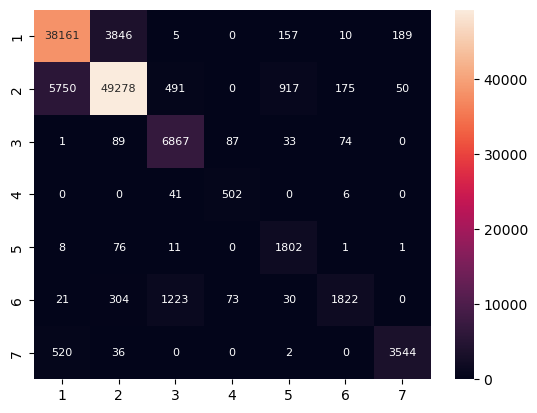

In [94]:
ax = plt.subplot()
cm_heatmap = sns.heatmap(cm2, annot=True, fmt='.0f', annot_kws={"size":8}, ax=ax)
cm_heatmap.set_xticklabels(range(1,8))
cm_heatmap.set_yticklabels(range(1,8))
plt.show()

In [95]:
diff_scores = scores_df-scores_df2
diff_scores

,precision,recall,f1score
1,-0.026817,0.027025,-0.002017
2,0.013194,-0.018125,-0.003606
3,0.055143,-0.056076,0.006484
4,0.115524,-0.233151,-0.063458
5,0.145338,-0.317009,-0.055369
6,-0.136110,0.248776,0.099217
7,-0.028906,-0.001219,-0.014169


In [96]:
melted_df = diff_scores.reset_index().melt(id_vars='index', value_vars=['precision', 'recall', 'f1score'])
melted_df.head()

,index,variable,value
0,1,precision,-0.026817
1,2,precision,0.013194
2,3,precision,0.055143
3,4,precision,0.115524
4,5,precision,0.145338


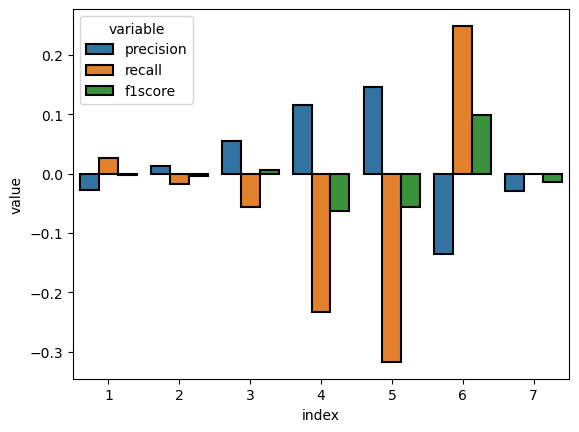

In [97]:
sns.barplot(data=melted_df, x='index', y='value', hue='variable', 
            linewidth=1.5, edgecolor="black")
plt.show()

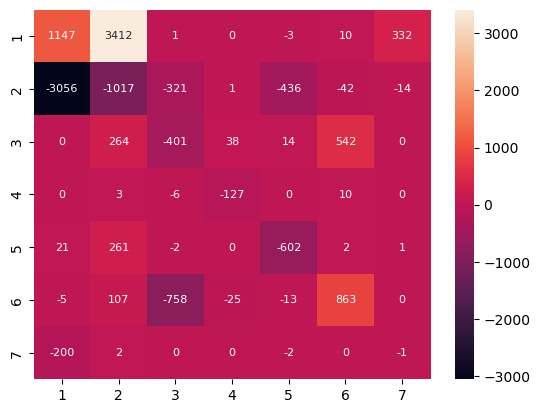

In [98]:
ax = plt.subplot()
cm_heatmap = sns.heatmap(cm-cm2, annot=True, fmt='.0f', annot_kws={"size":8}, ax=ax)
cm_heatmap.set_xticklabels(range(1,8))
cm_heatmap.set_yticklabels(range(1,8))
plt.show()

In [99]:
# separate pipeline to enable preprocessing of test set
preprocessor = Pipeline([('outlier_as_nan', outlier_nan_transf), 
                         ('fill_na', SimpleImputer(strategy='median')), 
                         ('scaler', scaler_transf),
                        ]).set_output(transform="pandas")

C:\Users\pawel\anaconda3\lib\site-packages\sklearn\preprocessing\_function_transformer.py:334: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


In [100]:
X_train_prep5 = preprocessor.fit_transform(X_train)
X_test_prep5 = preprocessor.transform(X_test)

In [115]:
# building base model
classifier5 = Sequential()
classifier5.add(Dense(units=54, kernel_initializer='he_uniform', activation='relu', input_dim = 54))
classifier5.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu'))
classifier5.add(Dense(units=35, kernel_initializer='he_uniform', activation='relu'))
classifier5.add(Dense(units=8, activation='softmax'))

# Compiling the ANN
classifier5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [116]:
train_pipeline = Pipeline([('over_sampler', over_transf),
                           ('model', classifier5)])

In [117]:
model_history5 = train_pipeline.fit(X_train_prep5, y_train, model__validation_split=0.33,
                                   model__batch_size=1000, model__epochs=100)

Epoch 1/100
1063/1063 [==============================] - 19s 12ms/step - loss: 0.5429 - accuracy: 0.7867 - val_loss: 1.4694 - val_accuracy: 0.4571
Epoch 2/100
1063/1063 [==============================] - 12s 11ms/step - loss: 0.3765 - accuracy: 0.8513 - val_loss: 1.2700 - val_accuracy: 0.5173
Epoch 3/100
1063/1063 [==============================] - 11s 10ms/step - loss: 0.3355 - accuracy: 0.8680 - val_loss: 1.2523 - val_accuracy: 0.5252
Epoch 4/100
1063/1063 [==============================] - 8s 8ms/step - loss: 0.3118 - accuracy: 0.8786 - val_loss: 1.2518 - val_accuracy: 0.5097
Epoch 5/100
1063/1063 [==============================] - 9s 9ms/step - loss: 0.2943 - accuracy: 0.8858 - val_loss: 1.1683 - val_accuracy: 0.5461
Epoch 6/100
1063/1063 [==============================] - 8s 8ms/step - loss: 0.2818 - accuracy: 0.8913 - val_loss: 1.0940 - val_accuracy: 0.5696
Epoch 7/100
1063/1063 [==============================] - 9s 8ms/step - loss: 0.2715 - accuracy: 0.8957 - val_loss: 1.1286 - 

In [118]:
# X_test_prep has the same preprocessing steps as steps in full_pipeline
score5 = classifier5.evaluate(X_test_prep5, y_test)
score5

3632/3632 [==============================] - 8s 2ms/step - loss: 0.3052 - accuracy: 0.8818


[0.30517640709877014, 0.8817500472068787]

In [119]:
y_pred5 = classifier5.predict(X_test_prep5)
y_pred5 = np.argmax(y_pred5, axis=1)
y_pred5

3632/3632 [==============================] - 10s 2ms/step


array([2, 1, 1, ..., 1, 2, 2], dtype=int64)

In [120]:
accuracy_score(y_test, y_pred5)

0.8817500408767416

In [121]:
# Classification Report

print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           1       0.88      0.89      0.88     42368
           2       0.92      0.89      0.90     56661
           3       0.77      0.97      0.86      7151
           4       0.75      0.95      0.84       549
           5       0.65      0.93      0.77      1899
           6       0.87      0.46      0.60      3473
           7       0.92      0.88      0.90      4102

    accuracy                           0.88    116203
   macro avg       0.82      0.85      0.82    116203
weighted avg       0.89      0.88      0.88    116203



In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
from scikeras.wrappers import KerasClassifier

In [66]:
# building base model
def create_model(optimizer='rmsprop'):
    model = Sequential()
    model.add(Dense(units=54, kernel_initializer='he_uniform', activation='relu', input_dim = 54))
    model.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(units=35, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(units=8, activation='softmax'))

    # Compiling the ANN
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [67]:
model = KerasClassifier(model=create_model)

In [52]:
param_grid = {
    'shuffle': [True, False], 
    'batch_size':[10, 32, 128, 1000],
    'optimizer':['RMSprop', 'Adam', 'sgd'],
}

In [142]:
kfold_splits = 3
grid = GridSearchCV(estimator=model,  
                    n_jobs=-1, 
                    verbose=1,
                    return_train_score=True,
                    cv=kfold_splits,  #StratifiedKFold(n_splits=kfold_splits, shuffle=True)
                    param_grid=param_grid,)

In [143]:
grid_result = grid.fit(X_train_prep2, y_train) #callbacks=[tbCallBack]

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 24 candidates, totalling 72 fits


C:\Users\pawel\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


46481/46481 [==============================] - 150s 3ms/step - loss: 0.4947 - accuracy: 0.7884
Best: 0.808848 using {'batch_size': 10, 'optimizer': 'sgd', 'shuffle': True}
0.805320 (0.001018) with: {'batch_size': 10, 'optimizer': 'RMSprop', 'shuffle': True}
0.750594 (0.084047) with: {'batch_size': 10, 'optimizer': 'RMSprop', 'shuffle': False}
0.806716 (0.003002) with: {'batch_size': 10, 'optimizer': 'Adam', 'shuffle': True}
0.750461 (0.090590) with: {'batch_size': 10, 'optimizer': 'Adam', 'shuffle': False}
0.808848 (0.004506) with: {'batch_size': 10, 'optimizer': 'sgd', 'shuffle': True}
0.756029 (0.081975) with: {'batch_size': 10, 'optimizer': 'sgd', 'shuffle': False}
0.801183 (0.003945) with: {'batch_size': 32, 'optimizer': 'RMSprop', 'shuffle': True}
0.761220 (0.064594) with: {'batch_size': 32, 'optimizer': 'RMSprop', 'shuffle': False}
0.800127 (0.001024) with: {'batch_size': 32, 'optimizer': 'Adam', 'shuffle': True}
0.764193 (0.055296) with: {'batch_size': 32, 'optimizer': 'Adam', '

In [68]:
param_grid2 = { 
    'batch_size':[32, 128, 1000],
    'optimizer':['Adam', 'sgd'],
}

In [69]:
kfold_splits = 3
grid2 = GridSearchCV(estimator=model,  
                    n_jobs=-1, 
                    verbose=1,
                    return_train_score=True,
                    cv=kfold_splits,  #StratifiedKFold(n_splits=kfold_splits, shuffle=True)
                    param_grid=param_grid2,)

grid_result2 = grid2.fit(X_train_prep2, y_train, epochs=100) #callbacks=[tbCallBack]

# summarize results
print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Epoch 1/100
14526/14526 [==============================] - 65s 4ms/step - loss: 0.5171 - accuracy: 0.7798
Epoch 2/100
14526/14526 [==============================] - 51s 4ms/step - loss: 0.4132 - accuracy: 0.8254
Epoch 3/100
14526/14526 [==============================] - 56s 4ms/step - loss: 0.3749 - accuracy: 0.8433
Epoch 4/100
14526/14526 [==============================] - 43s 3ms/step - loss: 0.3507 - accuracy: 0.8543
Epoch 5/100
14526/14526 [==============================] - 32s 2ms/step - loss: 0.3337 - accuracy: 0.8616
Epoch 6/100
14526/14526 [==============================] - 29s 2ms/step - loss: 0.3216 - accuracy: 0.8672
Epoch 7/100
14526/14526 [==============================] - 32s 2ms/step - loss: 0.3120 - accuracy: 0.8714
Epoch 8/100
14526/14526 [==============================] - 28s 2ms/step - loss: 0.3042 - accuracy: 0.8746
Epoch 9/100
14526/14526 [==============================] - 28s 2ms/step - loss: 0.2975 - acc

14526/14526 [==============================] - 34s 2ms/step - loss: 0.2161 - accuracy: 0.9134
Epoch 78/100
14526/14526 [==============================] - 31s 2ms/step - loss: 0.2162 - accuracy: 0.9130
Epoch 79/100
14526/14526 [==============================] - 34s 2ms/step - loss: 0.2158 - accuracy: 0.9135
Epoch 80/100
14526/14526 [==============================] - 32s 2ms/step - loss: 0.2155 - accuracy: 0.9134
Epoch 81/100
14526/14526 [==============================] - 30s 2ms/step - loss: 0.2149 - accuracy: 0.9139
Epoch 82/100
14526/14526 [==============================] - 30s 2ms/step - loss: 0.2152 - accuracy: 0.9136
Epoch 83/100
14526/14526 [==============================] - 28s 2ms/step - loss: 0.2145 - accuracy: 0.9135
Epoch 84/100
14526/14526 [==============================] - 32s 2ms/step - loss: 0.2148 - accuracy: 0.9142
Epoch 85/100
14526/14526 [==============================] - 34s 2ms/step - loss: 0.2141 - accuracy: 0.9139
Epoch 86/100
14526/14526 [========================

In [70]:
# building base model
classifier_opt = Sequential()
classifier_opt.add(Dense(units=54, kernel_initializer='he_uniform', activation='relu', input_dim = 54))
classifier_opt.add(Dense(units=50, kernel_initializer='he_uniform', activation='relu'))
classifier_opt.add(Dense(units=35, kernel_initializer='he_uniform', activation='relu'))
classifier_opt.add(Dense(units=8, activation='softmax'))

# Compiling the ANN
classifier_opt.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [71]:
model_history = classifier_opt.fit(X_train_prep2, y_train, validation_split=0.33, batch_size=32, epochs=100)

Epoch 1/100
9732/9732 [==============================] - 41s 4ms/step - loss: 0.6777 - accuracy: 0.7198 - val_loss: 0.5968 - val_accuracy: 0.7470
Epoch 2/100
9732/9732 [==============================] - 32s 3ms/step - loss: 0.5657 - accuracy: 0.7608 - val_loss: 0.5453 - val_accuracy: 0.7693
Epoch 3/100
9732/9732 [==============================] - 31s 3ms/step - loss: 0.5249 - accuracy: 0.7785 - val_loss: 0.5087 - val_accuracy: 0.7857
Epoch 4/100
9732/9732 [==============================] - 31s 3ms/step - loss: 0.4951 - accuracy: 0.7912 - val_loss: 0.4824 - val_accuracy: 0.7976
Epoch 5/100
9732/9732 [==============================] - 32s 3ms/step - loss: 0.4746 - accuracy: 0.7999 - val_loss: 0.4678 - val_accuracy: 0.8045
Epoch 6/100
9732/9732 [==============================] - 32s 3ms/step - loss: 0.4583 - accuracy: 0.8074 - val_loss: 0.4675 - val_accuracy: 0.8025
Epoch 7/100
9732/9732 [==============================] - 40s 4ms/step - loss: 0.4447 - accuracy: 0.8135 - val_loss: 0.4441 -

Epoch 57/100
9732/9732 [==============================] - 30s 3ms/step - loss: 0.2826 - accuracy: 0.8849 - val_loss: 0.2908 - val_accuracy: 0.8832
Epoch 58/100
9732/9732 [==============================] - 30s 3ms/step - loss: 0.2816 - accuracy: 0.8857 - val_loss: 0.2992 - val_accuracy: 0.8771
Epoch 59/100
9732/9732 [==============================] - 30s 3ms/step - loss: 0.2806 - accuracy: 0.8857 - val_loss: 0.3026 - val_accuracy: 0.8768
Epoch 60/100
9732/9732 [==============================] - 32s 3ms/step - loss: 0.2800 - accuracy: 0.8862 - val_loss: 0.2924 - val_accuracy: 0.8805
Epoch 61/100
9732/9732 [==============================] - 30s 3ms/step - loss: 0.2792 - accuracy: 0.8864 - val_loss: 0.2990 - val_accuracy: 0.8787
Epoch 62/100
9732/9732 [==============================] - 30s 3ms/step - loss: 0.2780 - accuracy: 0.8862 - val_loss: 0.2910 - val_accuracy: 0.8807
Epoch 63/100
9732/9732 [==============================] - 31s 3ms/step - loss: 0.2775 - accuracy: 0.8871 - val_loss: 0

In [72]:
score = classifier_opt.evaluate(X_test_prep2, y_test)
score

3632/3632 [==============================] - 10s 2ms/step - loss: 0.2716 - accuracy: 0.8898


[0.27161890268325806, 0.8897963166236877]

In [73]:
y_pred = classifier_opt.predict(X_test_prep2)
y_pred = np.argmax(y_pred, axis=1)
y_pred

3632/3632 [==============================] - 11s 2ms/step


array([2, 1, 1, ..., 1, 2, 2], dtype=int64)

In [74]:
accuracy_score(y_test, y_pred)

0.8897963047425625

In [75]:
# Classification Report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.90      0.87      0.89     42368
           2       0.89      0.92      0.91     56661
           3       0.87      0.90      0.88      7151
           4       0.86      0.68      0.76       549
           5       0.74      0.67      0.71      1899
           6       0.80      0.74      0.77      3473
           7       0.92      0.88      0.90      4102

    accuracy                           0.89    116203
   macro avg       0.85      0.81      0.83    116203
weighted avg       0.89      0.89      0.89    116203



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


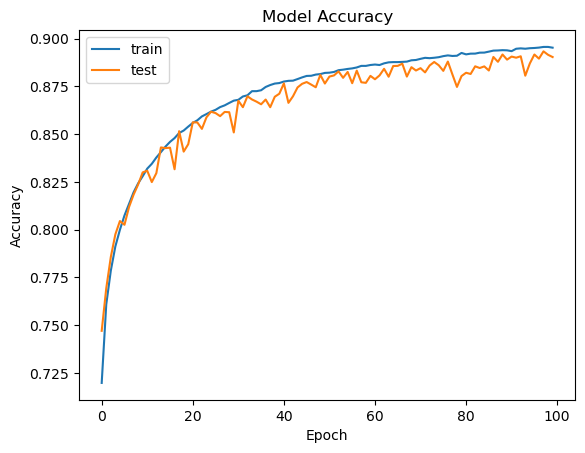

In [76]:
# List all data in history
print(model_history.history.keys())

# Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

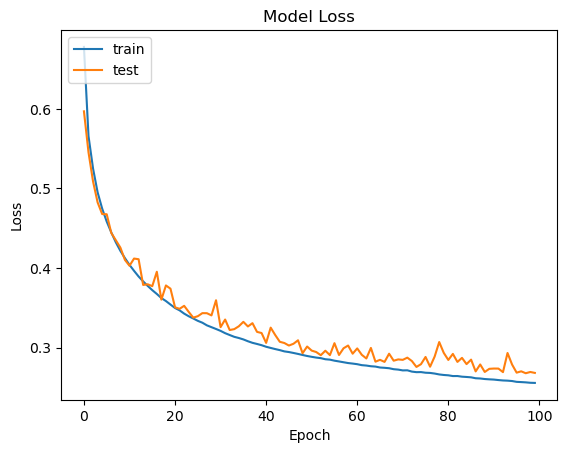

In [77]:
# Summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#TO DO

#grid search
#cross validation
#droput, relu

Counter({0: 1980, 1: 990})


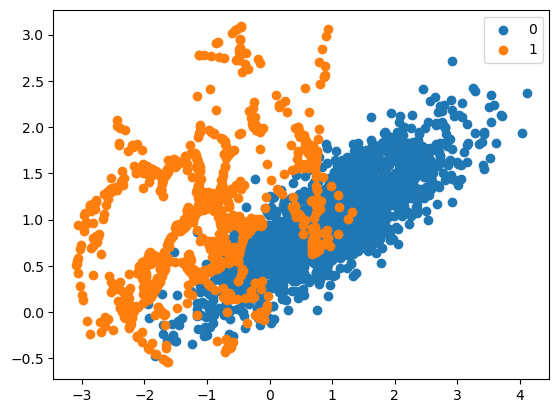

In [97]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

Class=0, n=1980 (66.667%)
Class=1, n=990 (33.333%)


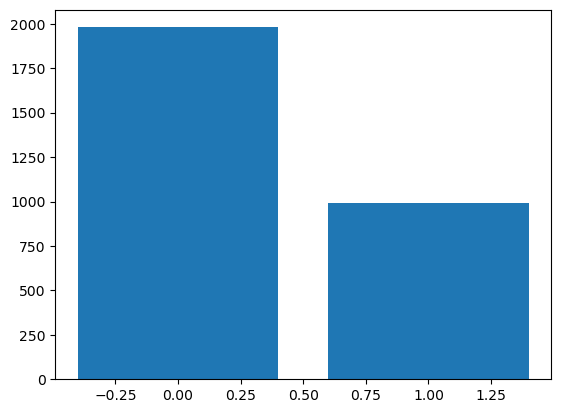

In [98]:
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [100]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

In [101]:
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
    # define pipeline
    model = DecisionTreeClassifier()
    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
    under = RandomUnderSampler(sampling_strategy=0.5)
    steps = [('over', over), ('under', under), ('model', model)]
    pipeline = Pipeline(steps=steps)
    # evaluate pipeline
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.817
> k=2, Mean ROC AUC: 0.832
> k=3, Mean ROC AUC: 0.825
> k=4, Mean ROC AUC: 0.840
> k=5, Mean ROC AUC: 0.847
> k=6, Mean ROC AUC: 0.841
> k=7, Mean ROC AUC: 0.839
